<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Amirreza Bagheri Delouee
### Student Number : 98109804
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [2]:
#TODO
heart_df = pd.read_csv("heart_disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
X = heart_df.iloc[:, 0:-1]
y = heart_df.iloc[:, -1]
print(np.unique(y))

[0 1]


In [13]:
y.replace(0, -1, inplace=True)
y = y.to_numpy()
print(np.unique(y))

[-1  1]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Adaboost Algorithm Implementation (40 points)

In [18]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    error = 0
    for i in range(len(y)):
        error += (w[i] * int(y[i] != y_pred[i]))
    error = error/sum(w)
    return error
    

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    alpha = np.log((1-error)/error)
    return alpha
    

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    w_new = w.copy()
    for i in range(len(w)):
        if y[i] == y_pred[i]:
            w_new[i] = w[i]
        else:
            w_new[i] = w[i] * np.exp(alpha)
    return w_new
    

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                #TODO
                w = np.array([1/len(y) for i in range(len(y))])
            else:
                #TODO
                w = update_weights(w, alpha, y, y_pred)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            #TODO
            weak_classifier = DecisionTreeClassifier(max_depth=1)
            weak_classifier.fit(X, y, sample_weight=w)
            y_pred = weak_classifier.predict(X)
            self.G_M.append(weak_classifier)


            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            #TODO
            error = calculate_error(y, y_pred, w)
            self.training_errors.append(error)


            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            #TODO
            alpha = calculate_alpha(error)
            self.alphas.append(alpha)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#TODO : Fit model
ada_model = AdaBoost()
ada_model.fit(X_train, y_train, M=100)


#TODO : Predict on test data
y_pred_test = ada_model.predict(X_test)


#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"Precision: {precision_score(y_test, y_pred_test)}")
print(f"Recall: {recall_score(y_test, y_pred_test)}")
print(f"F1 score: {f1_score(y_test, y_pred_test)}")

Accuracy: 0.8249027237354085
Precision: 0.8076923076923077
Recall: 0.84
F1 score: 0.8235294117647058


In [21]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [24]:
y_pred_sklearn = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_sklearn)}")
print(f"Precision: {precision_score(y_test, y_pred_sklearn)}")
print(f"Recall: {recall_score(y_test, y_pred_sklearn)}")
print(f"F1 score: {f1_score(y_test, y_pred_sklearn)}")

Accuracy: 0.8793774319066148
Precision: 0.8852459016393442
Recall: 0.864
F1 score: 0.8744939271255061


### Early Stopping (15 points)

In [36]:
#TODO : Calculate validation error for different number of estimators 
w = [1/len(y_test) for i in range(len(y_test))]
max_n_estimators = 100
validation_errors = [0 for i in range(max_n_estimators)]
n_estimators = [i for i in range(1, max_n_estimators + 1)]
for n_estimator in n_estimators:
    model = AdaBoost()
    model.fit(X_train, y_train, M=n_estimator)
    y_pred = model.predict(X_test)
    validation_errors[n_estimator] = calculate_error(y_test, y_pred, w)

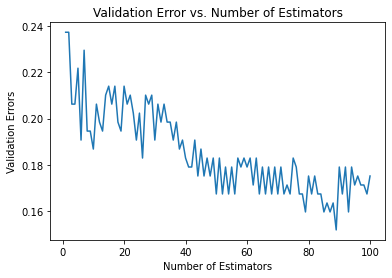

In [37]:
#TODO : Plot validation error versus number of estimators figure.
plt.plot(n_estimators, validation_errors)
plt.xlabel("Number of Estimators")
plt.ylabel("Validation Errors")
plt.title("Validation Error vs. Number of Estimators")
plt.show()

In [39]:
#TODO : Print the best number for estimators and minimum value for validation error.
min_index = np.argmin(validation_errors)
print(f"Best number of estimators: {min_index + 1}")
print(f"Minimum value for validation error: {validation_errors[min_index]}")

Best number of estimators: 89
Minimum value for validation error: 0.1517509727626463


### Weighted Error (10 points)

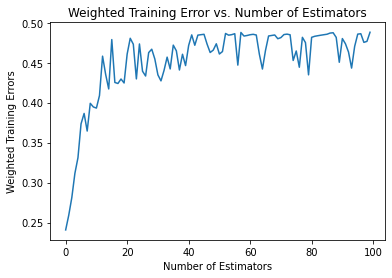

In [44]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
ada_model = AdaBoost()
ada_model.fit(X_train, y_train, M=100)

plt.plot(ada_model.training_errors)
plt.xlabel("Number of Estimators")
plt.ylabel("Weighted Training Errors")
plt.title("Weighted Training Error vs. Number of Estimators")
plt.show()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

در الگوریتم آدابوست در هر مرحله، تعدادی از داده‌هایی که در مرحله قبل نادرست پیش‌بینی شده بودند، وزن بالاتری دریافت می‌کنند و سعی می‌شود که آن داده‌ها را درست پیش‌بینی کند. اما اینکار می‌تواند به این منجر شود که تعدادی از داده‌هایی که در مراحل قبلی درست پیش‌بینی شده‌اند، در مرحله فعلی نادرست پیش‌بینی شوند. بنابراین مشاهده می‌شود که در الگوریتم آدابوست، به طور میانگین هر مرحله که جلوتر می‌رویم احتمالا داده‌های بیشتری را نادرست پیش‌بینی می‌کنیم. البته با توجه به اینکه نهایتا یک میانگین از همه پیش‌بینی‌ها گرفته می‌شود، این مشکل رفع می‌شود.